## Simple Cost Function

$f(x) = x^2 + x + 1$

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm #color map

%matplotlib inline

In [76]:
# generating the data
x_1 = np.linspace(start=-3,stop=3,num=100)

In [77]:
def f(x):
    return (x**2 + x + 1)

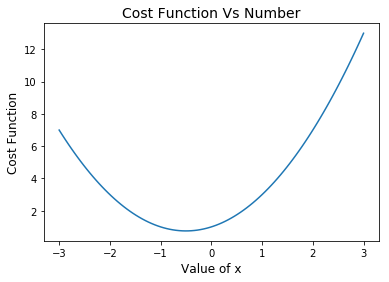

In [78]:
plt.plot(x_1, f(x_1))
plt.xlabel('Value of x', fontsize=12)
plt.ylabel('Cost Function',fontsize=12)
plt.title('Cost Function Vs Number',fontsize=14)
plt.show()

### Slope of Cost Function

In [79]:
def df(x):
    return 2*x + 1

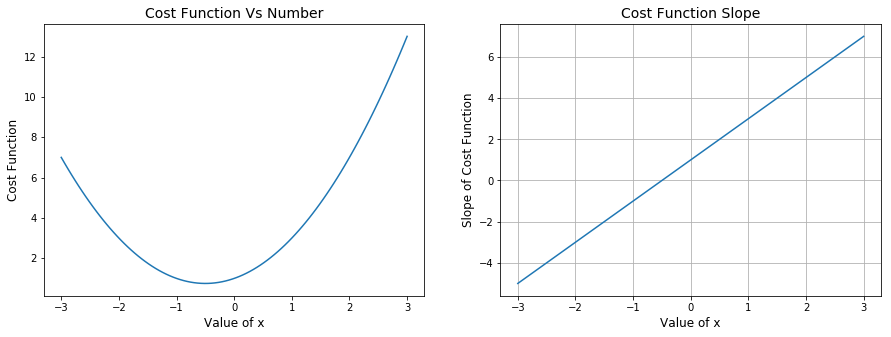

In [80]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(x_1,((x_1)**2 + (x_1) + 1))
plt.xlabel('Value of x', fontsize=12)
plt.ylabel('Cost Function',fontsize=12)
plt.title('Cost Function Vs Number',fontsize=14)

plt.subplot(1,2,2)
plt.plot(x_1,df(x_1))
plt.xlabel('Value of x', fontsize=12)
plt.ylabel('Slope of Cost Function',fontsize=12)
plt.title('Cost Function Slope',fontsize=14)
plt.grid()

plt.show()

In [81]:
# for loop and Gradient Descent

new_x = 3  # starting point
previous_x = 0  # temp variable
step_multiplier = 0.1  # to reduce the value of x in each step
precision = 0.000001


x_list=[new_x]
slope_list=[df(new_x)]

for i in range(500):
    previous_x = new_x
    gradient = df(previous_x) # the slope
    new_x = previous_x - step_multiplier*gradient
    
    step_value = abs(new_x - previous_x)
    if step_value < precision:
        break
    
    
    x_list.append(new_x)
    slope_list.append(df(new_x))

print('the number of times loop ran:', i)    
print('Local minimum occurs at:', new_x)
print('Slope value at this point is :', df(new_x))
print('Cost Function at this point is:', f(new_x))

the number of times loop ran: 61
Local minimum occurs at: -0.4999965672099885
Slope value at this point is : 6.8655800230521535e-06
Cost Function at this point is: 0.750000000011784


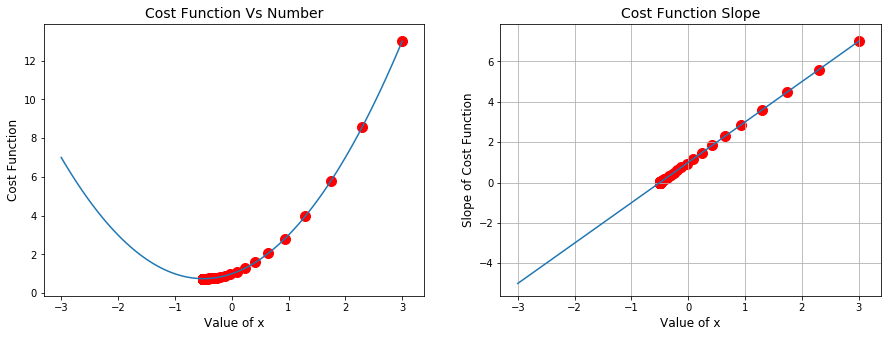

In [82]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.plot(x_1,f(x_1))

x_values = np.array(x_list)
plt.scatter(x_list,f(x_values),color='red',s=100)

plt.xlabel('Value of x', fontsize=12)
plt.ylabel('Cost Function',fontsize=12)
plt.title('Cost Function Vs Number',fontsize=14)

plt.subplot(1,2,2)
plt.plot(x_1,df(x_1))

plt.scatter(x_list,slope_list,color='red',s=100)

plt.xlabel('Value of x', fontsize=12)
plt.ylabel('Slope of Cost Function',fontsize=12)
plt.title('Cost Function Slope',fontsize=14)
plt.grid()

plt.show()

## Working with Data and a Real Cost Function
### Mean Squared Error: A Cost Function for Regression

$MSE = \frac{1}{n} \sum_{i=1}^n \big(y - \hat{y}\big)^2 $

In [83]:
#Generating Data for Regression
x_5 = np.array([0.1, 1.2, 2.4, 3.2, 4.1, 4.5, 5.2])
y_5 = np.array([0.5, 0.9, 1.5, 2.3, 3.1, 3.9, 4.8])

In [84]:
#checking the dimension of the arrays
print(x_5.shape)
print(y_5.shape)

(7,)
(7,)


In [85]:
# Linear Regression does not accept one-dimensional array
# Either apply transpose or reshape array method
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 4.5, 5.2]]).transpose()
y_5 = np.array([0.5, 0.9, 1.5, 2.3, 3.1, 3.9, 4.8]).reshape(7,1)

In [86]:
# now let's see the dimension of arrays
print(x_5.shape)
print(y_5.shape)

(7, 1)
(7, 1)


In [87]:
regr = LinearRegression()
regr.fit(x_5,y_5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Text(0.5, 1.0, 'Best Fitted Line')

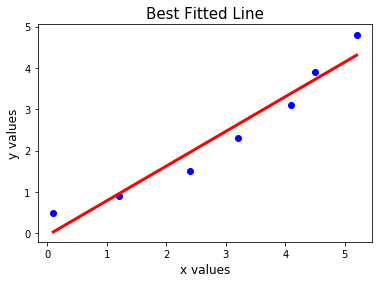

In [88]:
plt.scatter(x_5, y_5, color = 'blue')
plt.plot(x_5, regr.predict(x_5), color = 'red', linewidth = 3)
plt.xlabel('x values', fontsize = 12)
plt.ylabel('y values', fontsize = 12)
plt.title('Best Fitted Line', fontsize = 15)

In [89]:
print('The intercept:', regr.intercept_[0])
print('The slope:', regr.coef_[0][0])

The intercept: -0.04893930879460484
The slope: 0.8378055633604944


In [90]:
# calculating the predicted values
y_hat = -0.04893930879460484 + 0.8378055633604944*x_5

In [91]:
print('The predicted y values are:\n', y_hat)
print('The actual y values are:\n', y_5)

The predicted y values are:
 [[0.03484125]
 [0.95642737]
 [1.96179404]
 [2.63203849]
 [3.3860635 ]
 [3.72118573]
 [4.30764962]]
The actual y values are:
 [[0.5]
 [0.9]
 [1.5]
 [2.3]
 [3.1]
 [3.9]
 [4.8]]


In [92]:
# Calculating MSE

def mse(y, y_hat):
    mse_calc = (1/(y.size))*sum((y-y_hat)**2)
    return mse_calc

In [93]:
#calling the function
print('The manually calculated MSE:', mse(y_5, y_hat))
print('The MSE from sklearn:', mean_squared_error(y_5, y_hat))

The manually calculated MSE: [0.12846797]
The MSE from sklearn: 0.1284679685304861


In [94]:
# F string demo and nested loop
for i in range (2):
    for j in range (2):
        print(f'hello for the {i} loop and hello for the {j} loop')

hello for the 0 loop and hello for the 0 loop
hello for the 0 loop and hello for the 1 loop
hello for the 1 loop and hello for the 0 loop
hello for the 1 loop and hello for the 1 loop


## 3D Plot for the MSE Cost Function
### Generate Data for thetas

In [95]:
nr_thetas = 200
th_0 = np.linspace(start=-1,stop=3,num=nr_thetas)
th_1 = np.linspace(start=-1,stop=3,num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1) # to change it to a 2d array required for 3d plot
plot_t0.shape

(200, 200)

In [96]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + x_5*plot_t1[i][j]
        plot_cost[i][j] = mse(y_5, y_hat)
        
print('Shape of plot_t0:', plot_t0.shape)
print('Shape of plot_t1:', plot_t0.shape)
print('Shape of plot_cost:', plot_t0.shape)

Shape of plot_t0: (200, 200)
Shape of plot_t1: (200, 200)
Shape of plot_cost: (200, 200)


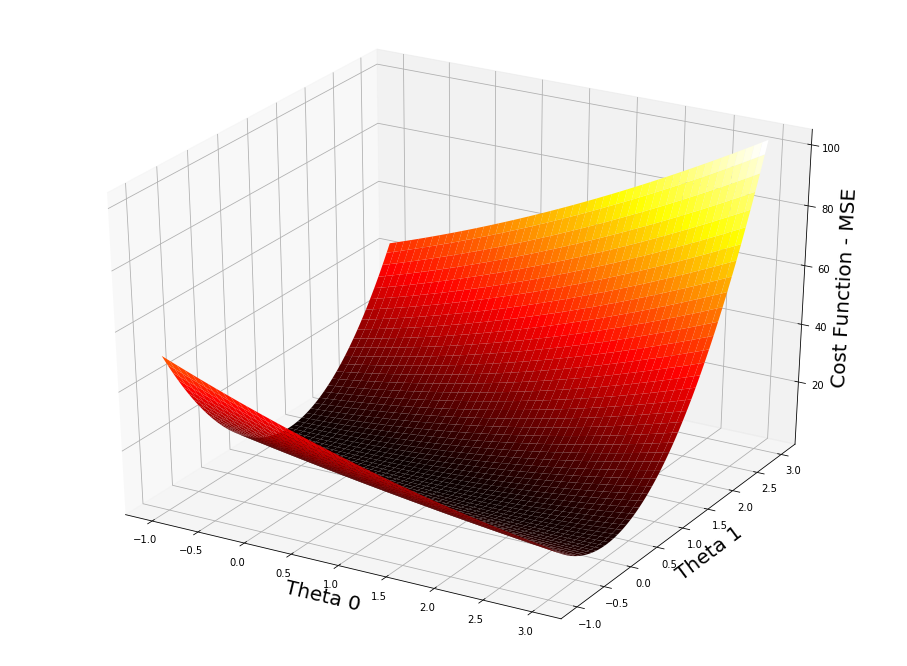

In [97]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') # gca(projection='3d') method stands for 'get current axes'

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost Function - MSE', fontsize=20)

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap=cm.hot)
plt.show()

In [98]:
print('Min. value of plot_cost MSE', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min. occurs at (i,j)', ij_min)
print('Value of Theta 0 at min. MSE', plot_t0[91][49])
print('Value of Theta 1 at min. MSE', plot_t1[91][49])

Min. value of plot_cost MSE 0.12875399971862175
Min. occurs at (i,j) (91, 49)
Value of Theta 0 at min. MSE -0.015075376884422065
Value of Theta 1 at min. MSE 0.829145728643216


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$
## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) $$
## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big) $$

## MSE and Gradient Descent

In [99]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    return np.array([theta0_slope[0], theta1_slope[0]])

In [100]:
multiplier = 0.01
thetas = np.array([2.9,2.9])

# collect data points for scatter plot

plot_vals = thetas.reshape(1,2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)


for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1,2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1] * x_5))

print('Min. occurs at Theta 0:', thetas[0])
print('Min. occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1] * x_5))

Min. occurs at Theta 0: -0.028169758895489568
Min. occurs at Theta 1: 0.8324255257464379
MSE is: [0.12857568]


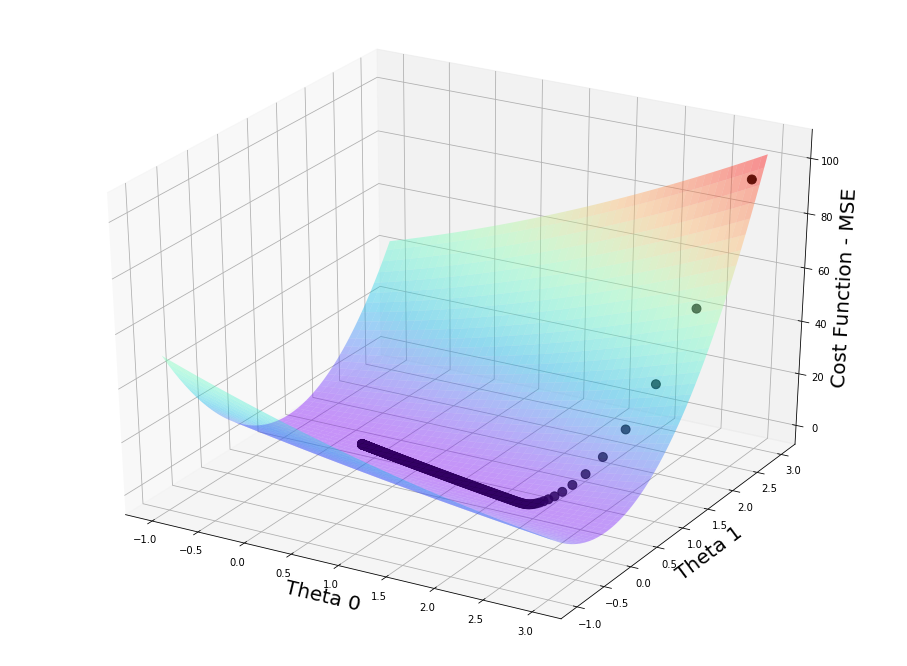

In [101]:
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection='3d') # gca(projection='3d') method stands for 'get current axes'

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost Function - MSE', fontsize=20)

ax.scatter(plot_vals[:,0], plot_vals[:,1], mse_vals, s=80, color='black')

ax.plot_surface(plot_t0,plot_t1,plot_cost, cmap=cm.rainbow, alpha = 0.4)
plt.show()